In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from LinearRegression import *

In [2]:
csv = np.genfromtxt("e1.csv", delimiter=',', skip_header=1, dtype=float)
np.random.shuffle(csv)
train_len = int(csv.shape[0]*0.9)
train_csv = csv[:train_len]
val_csv = csv[train_len:]

t_data = train_csv[:,:-2]
t_label = np.array(train_csv[:,-2]).reshape(len(t_data),1)

v_data = val_csv[:,:-2]
v_label = np.array(val_csv[:,-2]).reshape(len(v_data),1)

In [3]:
lr = LinearRegression(t_data,t_label)
costs = lr.train(0.1,17000)
r2=lr.score(v_data,v_label)
print(f"r2:{r2}")

r2:0.9999928672099478


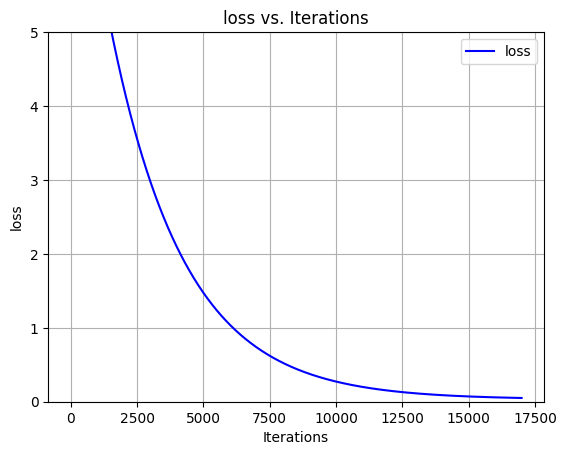

In [4]:
plt.plot(range(len(lr.loss)), lr.loss, label='loss', color='blue')
plt.title('loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.legend() 
plt.ylim(0,5)
plt.grid(True) 
plt.show()

In [5]:
lr.save_model("e1.npz")

In [40]:
num=0
for _ in range(1000):
    i = random_integer = random.randint(-1000, 1000) 
    test_data = np.array([[i,i+1,i+2,i+3,i+4]])
    predict = round(float(lr.predict(test_data)))
    if(predict==i+5):num=num+1
print(f"example:test=>{[i,i+1,i+2,i+3,i+4]},predict=>{predict}")
print(f"precision：{num/1000*100}%")

example:test=>[-45, -44, -43, -42, -41],predict=>-40
precision：100.0%


In [2]:
lr = LinearRegression(None,None)
lr.load_model("e1.npz")